# Teensy Log Plotter
Updated for extended control/motor debug logging.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

log_path = 'log5.csv'
df = pd.read_csv(log_path)
df.head()

,t_us,ax_g,ay_g,az_g,gx_dps,gy_dps,gz_dps,roll_deg,pitch_deg,throttle_us,...,att_sp_yaw,rate_sp_roll,rate_sp_pitch,rate_sp_yaw,rate_meas_roll,rate_meas_pitch,rate_meas_yaw,rate_out_roll,rate_out_pitch,rate_out_yaw
0,26712450,-0.003,-0.003,0.998,0.15,0.00,-0.09,-0.05,0.03,1161,...,0.0,0.05,-0.03,0.0,0.15,0.00,-0.09,8.43,-22.45,7.73
1,26716450,0.009,-0.006,1.014,-0.11,0.20,-0.26,-0.06,-0.01,1163,...,0.0,0.06,0.01,0.0,-0.11,0.20,-0.26,54.95,-32.41,17.05
2,26720450,0.009,0.002,0.999,0.04,-0.10,-0.44,-0.06,-0.05,1163,...,0.0,0.06,0.05,0.0,0.04,-0.10,-0.44,-30.45,67.91,17.99
3,26724450,-0.002,-0.000,0.999,0.07,-0.06,-0.47,-0.07,-0.05,1163,...,0.0,0.07,0.05,0.0,0.07,-0.06,-0.47,-4.91,-6.02,4.29
4,26728450,-0.002,0.010,0.995,-0.04,-0.02,-0.15,-0.04,-0.04,1164,...,0.0,0.04,0.04,0.0,-0.04,-0.02,-0.15,15.79,-12.95,-32.68


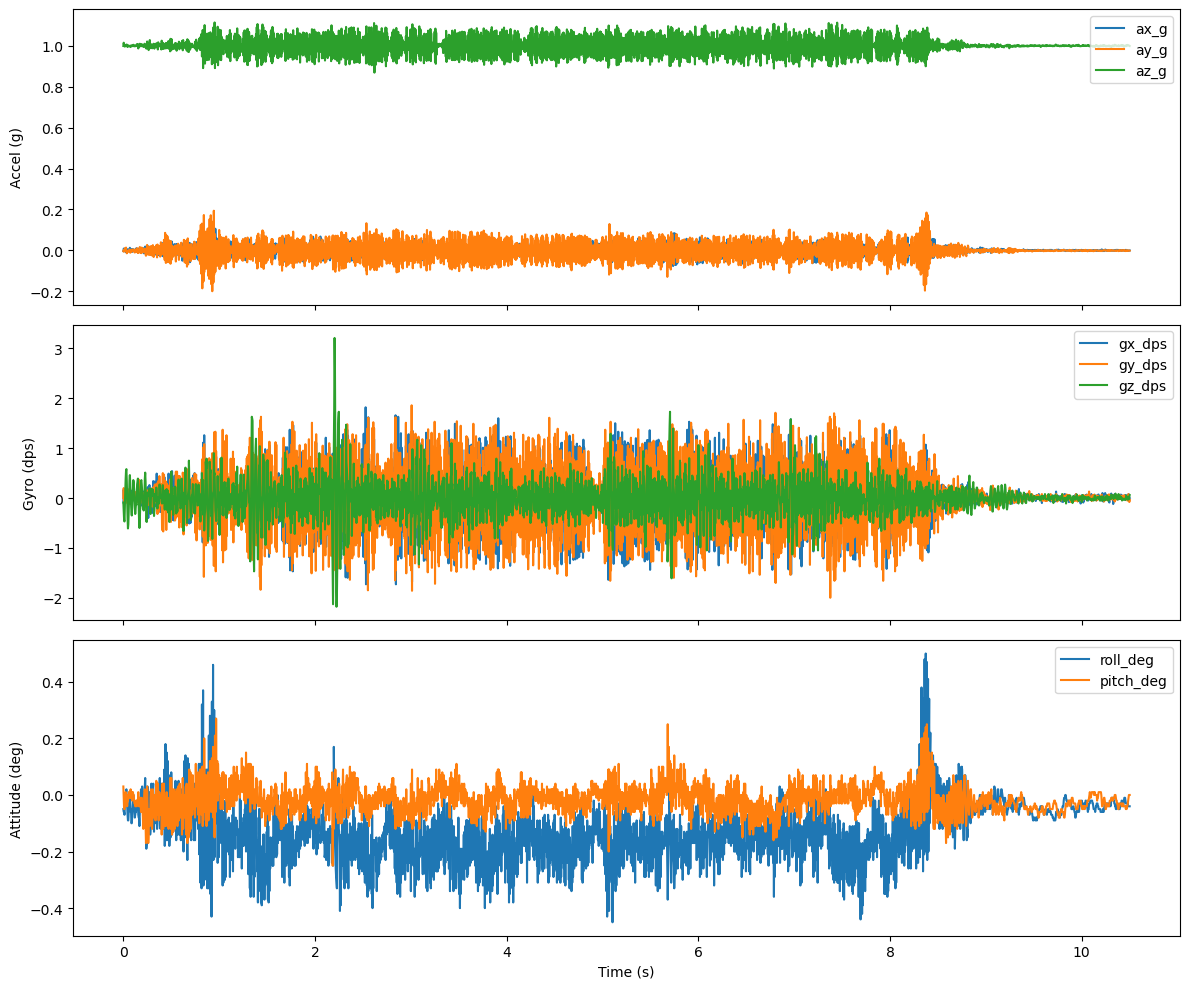

In [48]:
t = (df['t_us'] - df['t_us'].iloc[0]) / 1e6

fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

ax[0].plot(t, df['ax_g'], label='ax_g')
ax[0].plot(t, df['ay_g'], label='ay_g')
ax[0].plot(t, df['az_g'], label='az_g')
ax[0].set_ylabel('Accel (g)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['gx_dps'], label='gx_dps')
ax[1].plot(t, df['gy_dps'], label='gy_dps')
ax[1].plot(t, df['gz_dps'], label='gz_dps')
ax[1].set_ylabel('Gyro (dps)')
ax[1].legend(loc='upper right')

ax[2].plot(t, df['roll_deg'], label='roll_deg')
ax[2].plot(t, df['pitch_deg'], label='pitch_deg')
ax[2].set_ylabel('Attitude (deg)')
ax[2].set_xlabel('Time (s)')
ax[2].legend(loc='upper right')

plt.tight_layout()

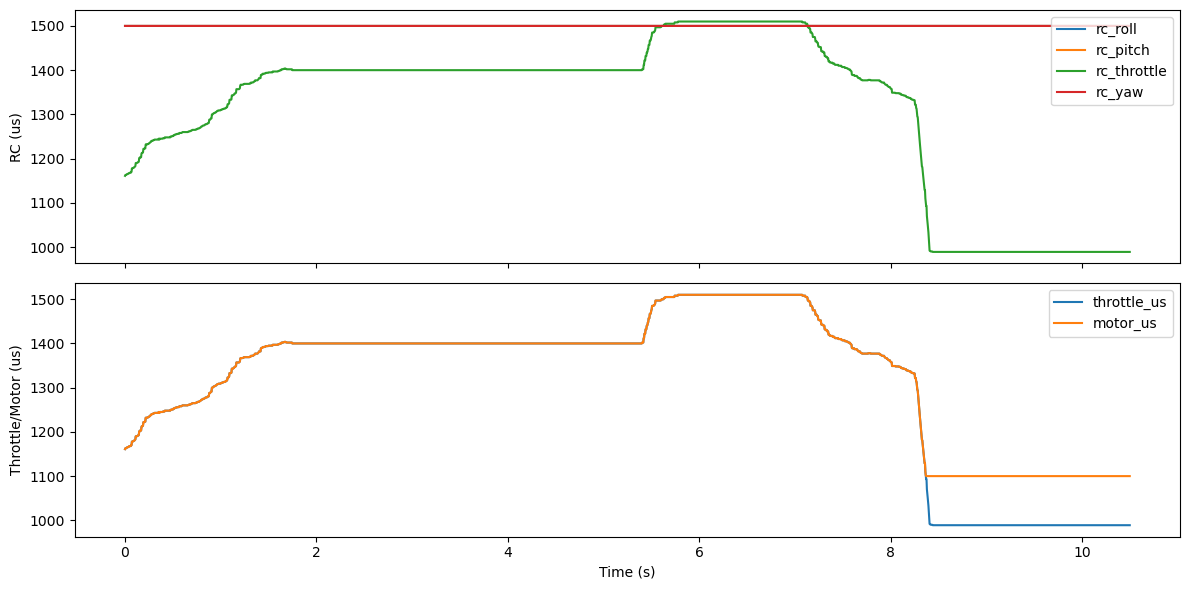

In [49]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(t, df['rc_roll'], label='rc_roll')
ax[0].plot(t, df['rc_pitch'], label='rc_pitch')
ax[0].plot(t, df['rc_throttle'], label='rc_throttle')
ax[0].plot(t, df['rc_yaw'], label='rc_yaw')
ax[0].set_ylabel('RC (us)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['throttle_us'], label='throttle_us')
ax[1].plot(t, df['motor_us'], label='motor_us')
ax[1].set_ylabel('Throttle/Motor (us)')
ax[1].set_xlabel('Time (s)')
ax[1].legend(loc='upper right')

plt.tight_layout()

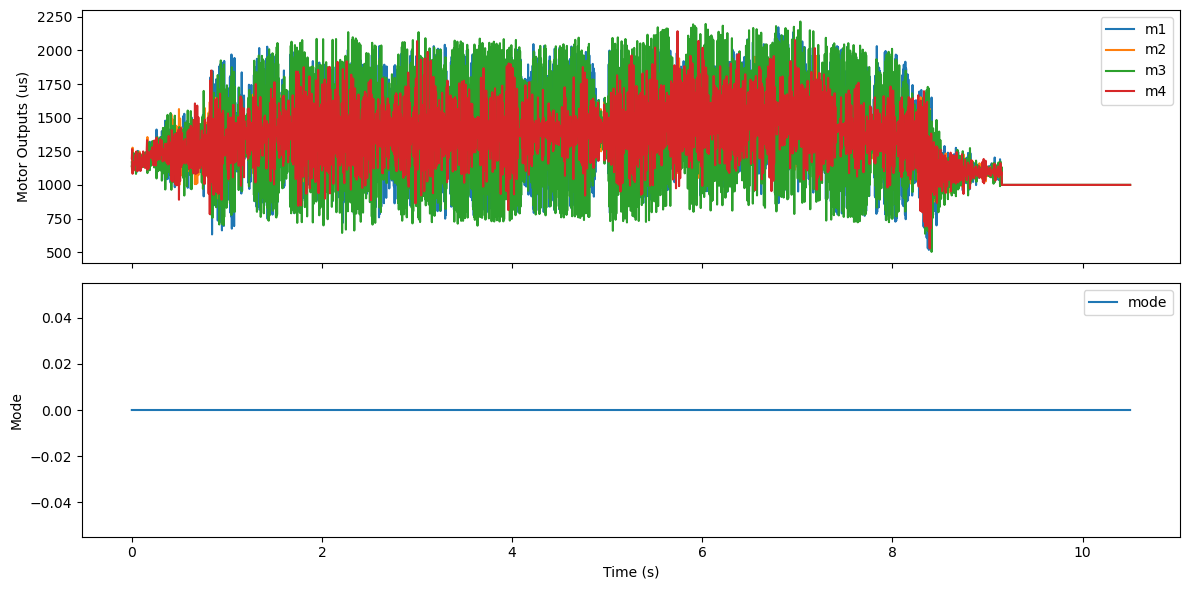

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax[0].plot(t, df['m1'], label='m1')
ax[0].plot(t, df['m2'], label='m2')
ax[0].plot(t, df['m3'], label='m3')
ax[0].plot(t, df['m4'], label='m4')
ax[0].set_ylabel('Motor Outputs (us)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['mode'], label='mode')
ax[1].set_ylabel('Mode')
ax[1].set_xlabel('Time (s)')
ax[1].legend(loc='upper right')

plt.tight_layout()

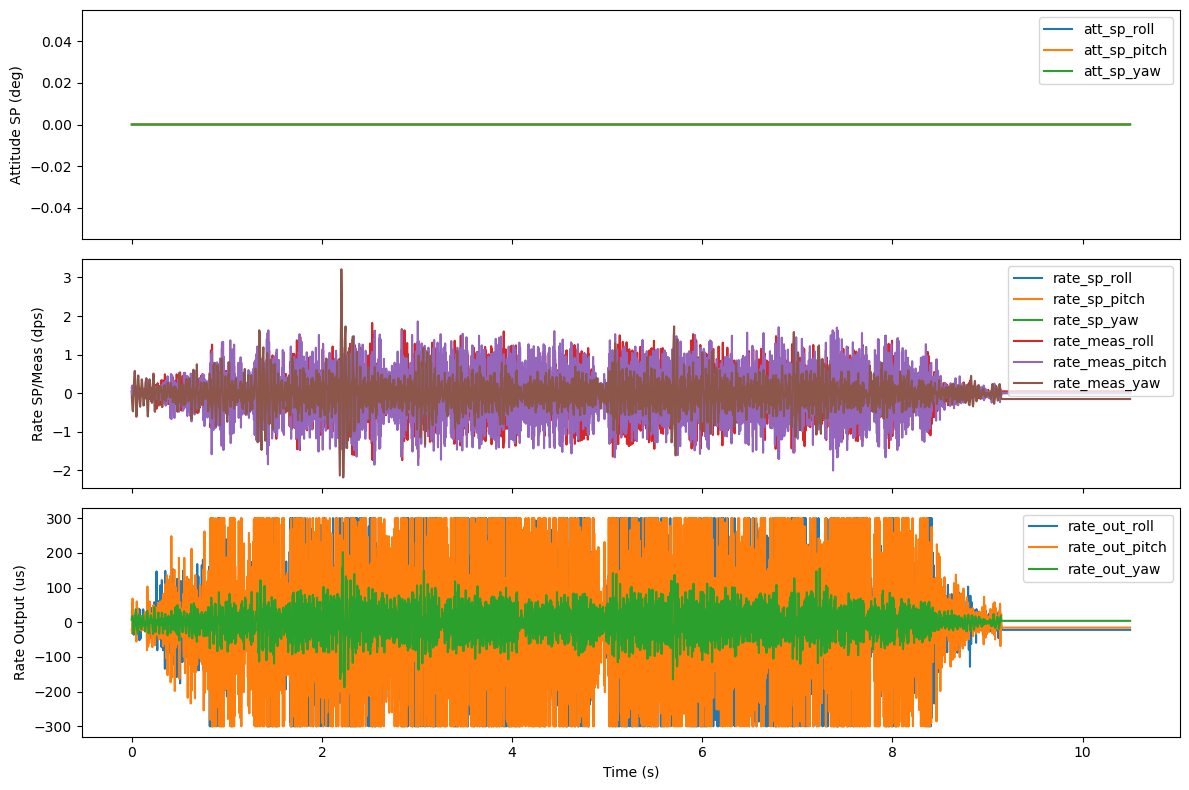

In [51]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

ax[0].plot(t, df['att_sp_roll'], label='att_sp_roll')
ax[0].plot(t, df['att_sp_pitch'], label='att_sp_pitch')
ax[0].plot(t, df['att_sp_yaw'], label='att_sp_yaw')
ax[0].set_ylabel('Attitude SP (deg)')
ax[0].legend(loc='upper right')

ax[1].plot(t, df['rate_sp_roll'], label='rate_sp_roll')
ax[1].plot(t, df['rate_sp_pitch'], label='rate_sp_pitch')
ax[1].plot(t, df['rate_sp_yaw'], label='rate_sp_yaw')
ax[1].plot(t, df['rate_meas_roll'], label='rate_meas_roll')
ax[1].plot(t, df['rate_meas_pitch'], label='rate_meas_pitch')
ax[1].plot(t, df['rate_meas_yaw'], label='rate_meas_yaw')
ax[1].set_ylabel('Rate SP/Meas (dps)')
ax[1].legend(loc='upper right')

ax[2].plot(t, df['rate_out_roll'], label='rate_out_roll')
ax[2].plot(t, df['rate_out_pitch'], label='rate_out_pitch')
ax[2].plot(t, df['rate_out_yaw'], label='rate_out_yaw')
ax[2].set_ylabel('Rate Output (us)')
ax[2].set_xlabel('Time (s)')
ax[2].legend(loc='upper right')

plt.tight_layout()